# 데이터 불러오기 및 전처리

In [3]:
import pandas as pd

file = pd.read_excel('./files/kto_201901.xlsx', header = 1, usecols = 'A:G', skipfooter = 5)
file.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      66 non-null     object
 1   관광      66 non-null     int64 
 2   상용      66 non-null     int64 
 3   공용      66 non-null     int64 
 4   유학/연수   66 non-null     int64 
 5   기타      66 non-null     int64 
 6   계       66 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.7+ KB


In [32]:
condition = (file['관광'] == 0)\
            |(file['상용'] == 0)\
            |(file['공용'] == 0)
file[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
4,마카오,2506,2,0,17,45,2570,2019-01
20,이스라엘,727,12,0,9,57,805,2019-01
22,우즈베키스탄,1958,561,0,407,2828,5754,2019-01
38,스위스,613,18,0,19,97,747,2019-01
46,포르투갈,416,14,0,13,121,564,2019-01
51,크로아티아,226,12,0,3,250,491,2019-01
54,폴란드,713,10,0,27,574,1324,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
65,교포소계,0,0,0,0,15526,15526,2019-01


In [33]:
file['기준년월'] = '2019-01'
file.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [34]:
# 대륙목록을 만들어서 대륙 목록에 해당하는 값 제외
continents_list = ['아시아주', '미주','구주','대양주','아프리카주','기타대륙','교포소계']
continents_list
file

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
...,...,...,...,...,...,...,...,...
61,남아프리카공화국,368,9,1,6,616,1000,2019-01
62,아프리카 기타,768,718,90,206,908,2690,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01


## 중요한 내용 
file.국적.isin(continents_list)  

In [45]:

condition = (file.국적.isin(continents_list) == False)
file_condition = file[condition]
file_condition['국적'].unique()



array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상'], dtype=object)

In [46]:
file_condition.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [50]:
# 인덱스 재설정하기
file_condition_newindex = file_condition.reset_index(drop=True)
file_condition_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [56]:
# 대륙 컬럼 값을 만들기

continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 \
+ ['아프리카']*2 + ['기타대륙'] 
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙']


In [57]:
file_condition_newindex['대륙'] = continents
file_condition_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [59]:
file_condition_newindex['관광객비율(%)'] = file_condition_newindex['관광']/file_condition_newindex['계']*100
round(file_condition_newindex,1)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,85.0
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7


In [62]:
# 관광객비율 컬럼으로 내림차순 정렬
file_condition_newindex.sort_values(by = '관광객비율(%)',ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.225209
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.509728
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.537219
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.261488
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.390879


In [63]:
file_condition_newindex.pivot_table(values = '관광객비율(%)', 
                                    index = '대륙',
                                    aggfunc = 'mean')


,관광객비율(%)
대륙,
기타대륙,61.111111
아메리카,68.194022
아시아,59.618773
아프리카,32.675093
오세아니아,84.806358
유럽,63.823453


In [66]:
condition = (file_condition_newindex['국적'] == '중국')
file_condition_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.492258


In [74]:
tourist_sum = sum(file_condition_newindex['관광'])
tourist_sum

884293

In [75]:
# 전체비율 컬럼 설정

file_condition_newindex['전체비율(%)'] = \
    round(file_condition_newindex['관광']/tourist_sum*100,1)
file_condition_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.261488,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.225209,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.537219,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.509728,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.266415,3.8


## 데이터 시각화 하기

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [3]:
# 예제 4-42 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

In [4]:
# 예제 4-43 matplotlib 라이브러리 불러오기 
import matplotlib.pyplot as plt

condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


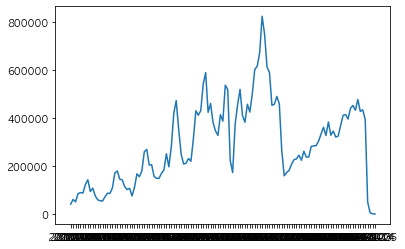

In [6]:
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

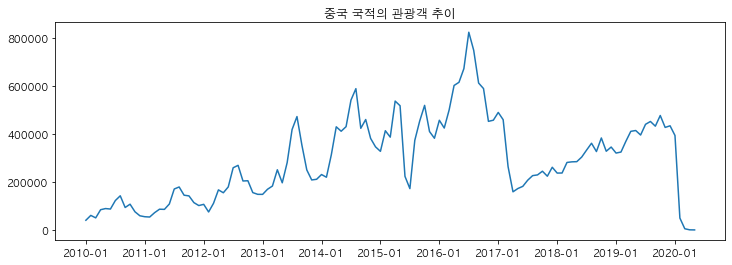

In [10]:
plt.figure(figsize = (12,4)) #그래프 크기 조절

plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.title('중국 국적의 관광객 추이')
# x 축 눈금 값 설정
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
plt.show()

In [11]:
# 우리나라에 방문하는 외국인 관광객 중 상위 5개 국가만 추출하기
cntry_list = ['중국','일본','대만','미국','홍콩']

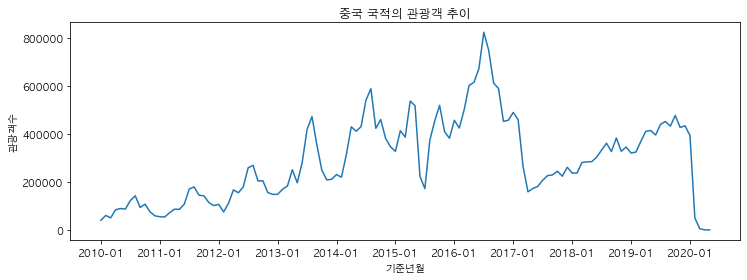

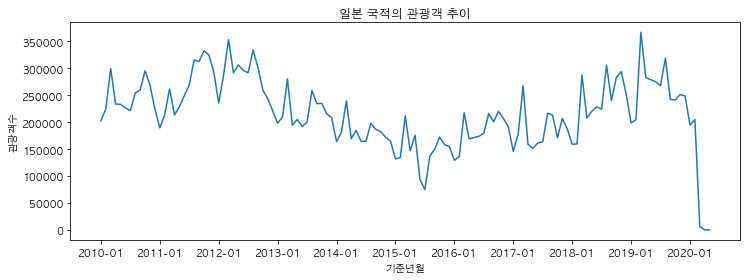

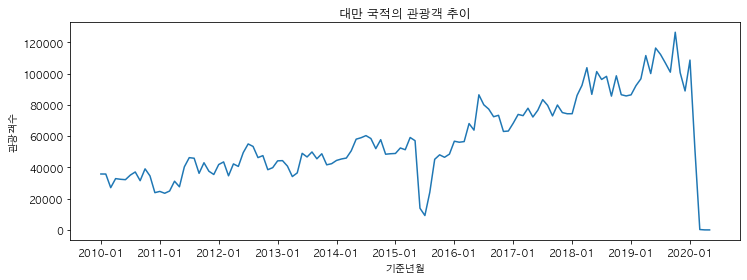

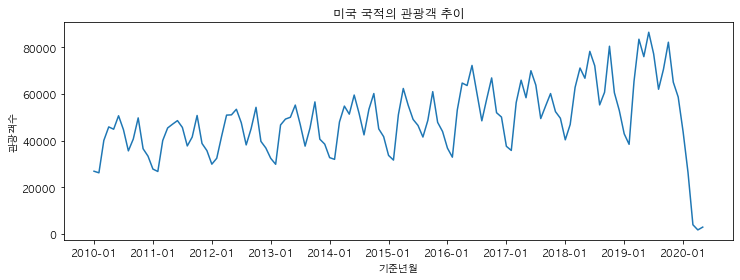

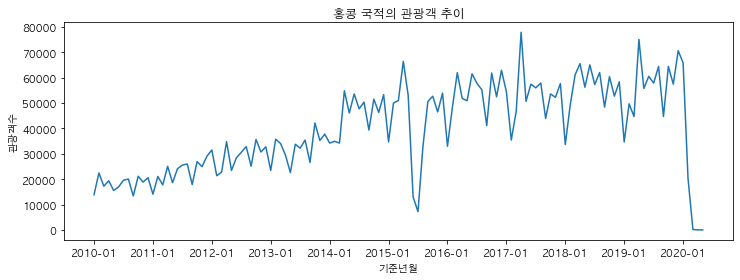

In [15]:
for cntry in cntry_list:
    
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    plt.figure(figsize = (12,4))
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

    plt.show()

In [16]:
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,대양주,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0


In [19]:
# str.slice 함수를 이용해 연도, 월 컬럼 만들기
df['연도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),연도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [20]:
# 중국인 관관객 필터링
condition  = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),연도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [23]:
# 피벗 테이블 values, index, columns 새롭게 설정해서 테이블 구성하기

df_pivot = df_filter.pivot_table(values = '관광', index = '연도', columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
연도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


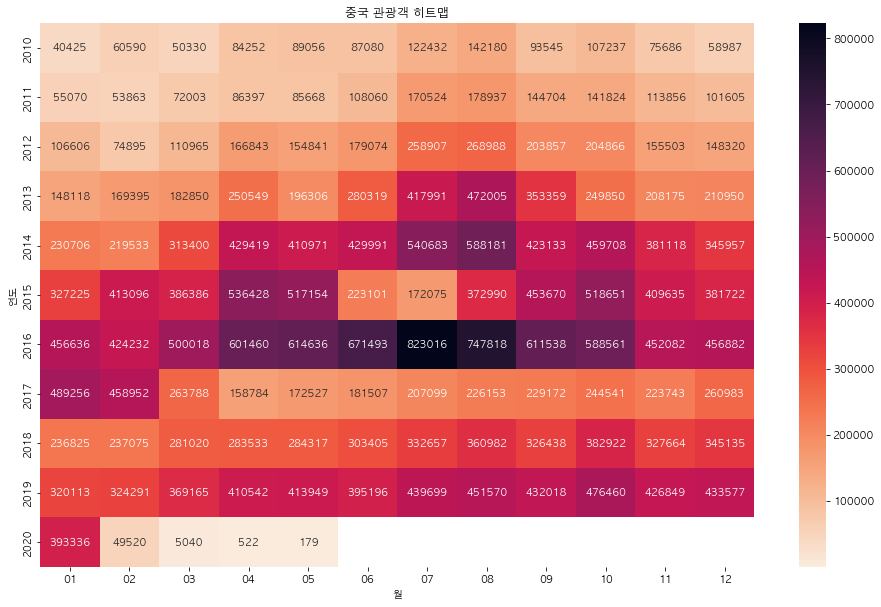

In [24]:
# 히트맵 그래프 그리기에 필요한 라이브러리

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,10))
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
plt.title("중국 관광객 히트맵")
plt.show()